**Step 1: Import Libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


**Step 2: Load Dataset**

In [2]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Step 3: Data Cleaning**

**Basic info:**

In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


**Convert TotalCharges to numeric**

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)


**Drop customerID**

In [5]:
df.drop('customerID', axis=1, inplace=True)


**Step 4: Exploratory Data Analysis (EDA)**

** Churn distribution:**

Text(0.5, 1.0, 'Churn Distribution')

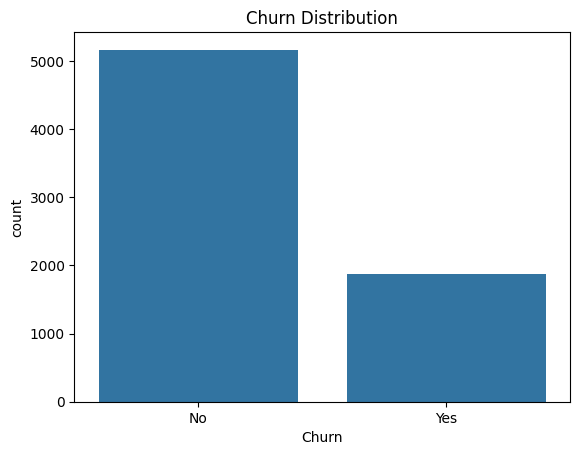

In [6]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")


**Correlation heatmap (numerical):**

<Axes: >

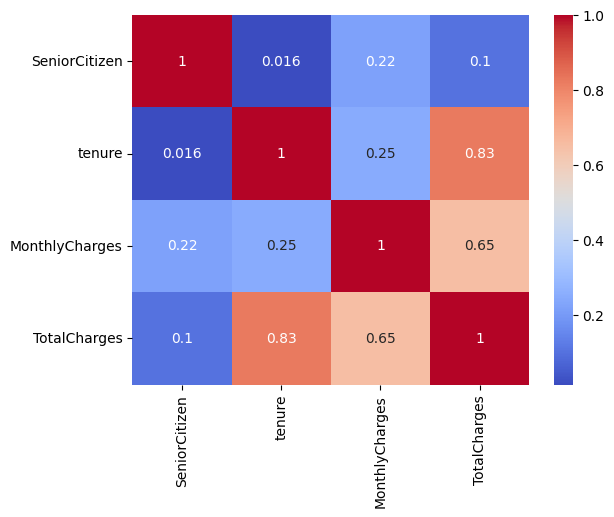

In [7]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')


**Churn vs categorical features:**

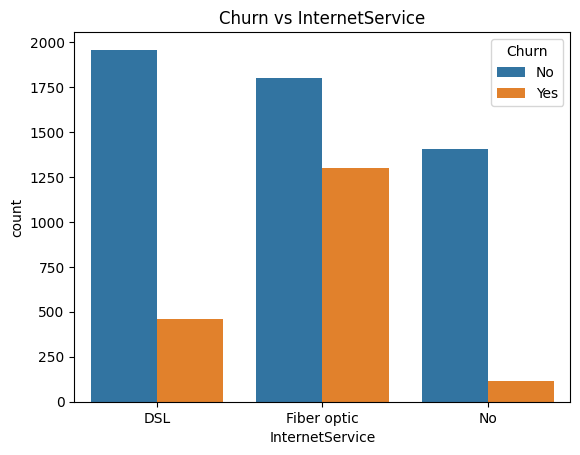

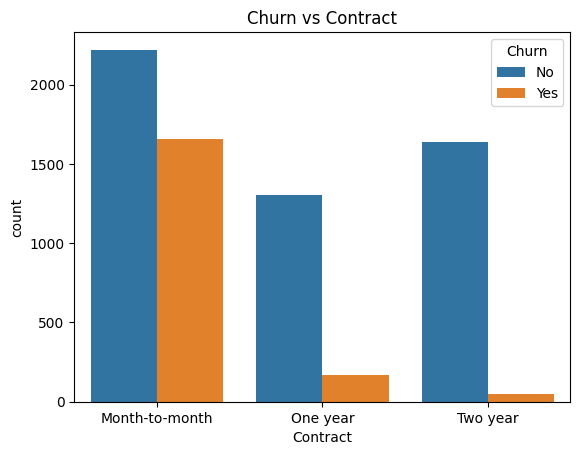

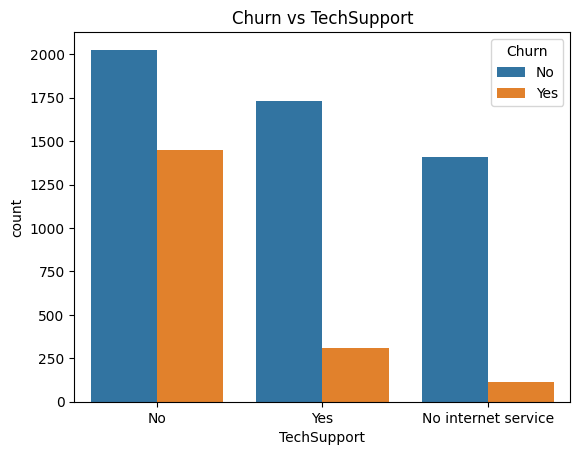

In [8]:
for col in ['InternetService', 'Contract', 'TechSupport']:
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f"Churn vs {col}")
    plt.show()


**Step 5: Preprocessing**

**Encode categorical variables:**

In [9]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

# Label encode target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# One-hot encode remaining categorical features
df_encoded = pd.get_dummies(df, drop_first=True)


**Feature scaling:**

In [10]:
scaler = StandardScaler()
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
X_scaled = scaler.fit_transform(X)


**Step 6: Train-Test Split**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


**Step 7: Modeling**

**Logistic Regression:**

In [12]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


**Random Forest**

In [13]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


**Step 8: Evaluation**

In [14]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_true, y_pred))

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")



Model: Logistic Regression
[[915 118]
 [181 193]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

ROC-AUC Score: 0.7009061919232185

Model: Random Forest
[[935  98]
 [204 170]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.63      0.45      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407

ROC-AUC Score: 0.6798380709319722


**Step 9: Feature Importance (Random Forest)**

Text(0.5, 1.0, 'Top 10 Important Features')

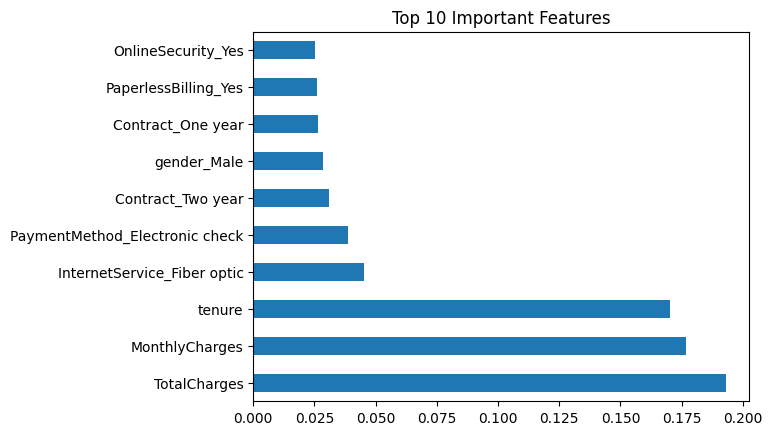

In [15]:
feature_imp = pd.Series(rf.feature_importances_, index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")


Based on your **model evaluation results**, here’s a well-structured **conclusion** that you can include in your project report or explain during interviews:

---

## **Conclusion: Customer Churn Prediction**

We trained and evaluated two machine learning models — **Logistic Regression** and **Random Forest Classifier** — to predict customer churn using the Telco dataset.

### 📊 **Model Performance Summary**

| Metric            | Logistic Regression | Random Forest |
| ----------------- | ------------------- | ------------- |
| Accuracy          | 79%                 | 79%           |
| Precision (Churn) | 0.62                | 0.63          |
| Recall (Churn)    | 0.52                | 0.45          |
| F1-score (Churn)  | 0.56                | 0.53          |
| ROC-AUC Score     | **0.70**            | 0.68          |

---

###  Key Observations:

* Both models achieve **good overall accuracy (79%)**, but this is slightly misleading due to class imbalance (more "No churn" cases).
* **Logistic Regression** performs better in **ROC-AUC (0.70)** and **recall (0.52)** for class `1` (churn), which is important in identifying customers likely to leave.
* **Random Forest** has slightly better precision for churn class (`0.63`), but significantly lower recall (`0.45`), meaning it misses more actual churners.

---

###  Class Imbalance Impact:

* The number of churners is much less than non-churners, which skews the metrics.
* High accuracy can be misleading when the dataset is imbalanced.
* Recall is crucial here because we care more about **catching potential churners**, even at the cost of a few false positives.

---

###  Final Verdict:

* **Logistic Regression** is the better choice here due to its higher recall and ROC-AUC score, making it more reliable in identifying churners.
* Further improvement can be achieved by:

  * Handling class imbalance using techniques like **SMOTE** or **class weighting**
  * Feature engineering (e.g., combining tenure and contract type)
  * Hyperparameter tuning (e.g., GridSearchCV)
  * Trying models like **XGBoost** for better performance







